In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics

In [69]:
rng = np.random.default_rng()
X = pd.DataFrame(rng.integers(0, 10, size=(2380, 10)), columns=list('ABCDEFGHIJ'))
Y = rng.integers(0, 2, size=(2380)).tolist()
X

,A,B,C,D,E,F,G,H,I,J
0,2,0,3,3,6,7,4,3,1,1
1,9,0,8,1,9,1,5,8,0,7
2,7,1,9,5,5,2,5,3,7,5
3,5,5,7,5,7,7,4,3,1,4
4,0,4,2,1,7,6,2,6,9,5
...,...,...,...,...,...,...,...,...,...,...
2375,5,7,6,6,7,2,4,8,4,0
2376,4,0,5,7,2,1,5,4,6,2
2377,4,6,4,1,4,7,7,5,0,3
2378,0,9,5,9,0,7,7,6,8,0


In [67]:

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))


1904
1904


Accuracy:  0.5105042016806722


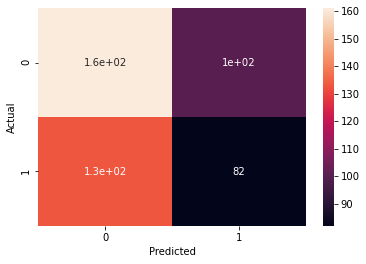

In [68]:
from sklearn.preprocessing import StandardScaler

#Logistic Regression function
logistic_regression= LogisticRegression(max_iter=20000)
sc = StandardScaler()

#Training
X_train = sc.fit_transform(X_train)
logistic_regression.fit(X_train,y_train)
X_test = sc.fit_transform(X_test)

#Testing
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

#Confussion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))